In [151]:
import cv2
import torch

image = cv2.imread('dog.jpg', 0)
image = image[24:,:]
image = torch.from_numpy(image).float()
image = image[None,:]
print(image.shape)

torch.Size([1, 276, 276])


In [152]:
import torch
from torch import nn
import numpy as np

sobel = np.array( [[1, 0, -1],
                   [2, 0, -2], 
                   [1, 0, -1]] )
sobel = torch.from_numpy(sobel).float()
sobel = sobel[None,None,:]

filters = np.array([ [[1, 0, -1],
                      [1, 0, -1], 
                      [1, 0, -1]],
                     [[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]]])
filters = torch.from_numpy(filters).float()
filters = filters[:,None,:,:]

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.pool = nn.MaxPool2d(3, padding=1, stride=1)
        self.fc = nn.Linear(276*276*2, 10)

    def forward(self, x):
        conv_out = nn.functional.conv2d(x[None,:], filters, stride=1, padding=1)
        relu_out = nn.functional.relu(conv_out)
        pool_out = self.pool(relu_out)

        x = torch.flatten(pool_out, 1)
        x = self.fc(x)
        

        return conv_out, pool_out, relu_out, x

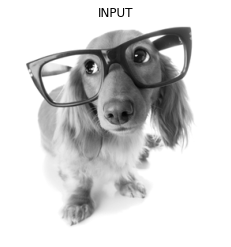

In [153]:
from matplotlib import pyplot as plt

plt.imshow(image.permute(1, 2, 0), cmap="gray")
plt.axis('off')
plt.title('INPUT')
plt.show()

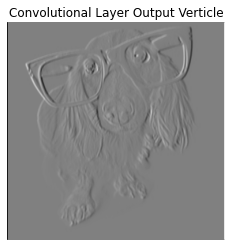

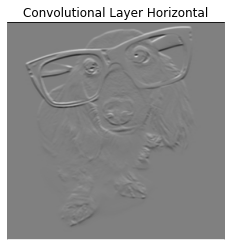

In [154]:
net = NeuralNetwork()
conv_out, pool_out, relu_out, x = net(image)

image_out = conv_out
plt.imshow(image_out[0,0,:,:], cmap="gray")
plt.axis('off')
plt.title('Convolutional Layer Output Verticle')
plt.show()
plt.imshow(image_out[0,1,:,:], cmap="gray")
plt.axis('off')
plt.title('Convolutional Layer Horizontal')
plt.show()

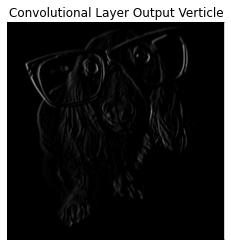

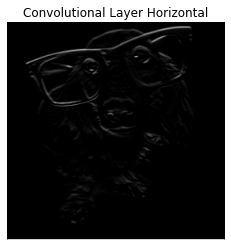

In [155]:
image_out = relu_out
plt.imshow(image_out[0,0,:,:], cmap="gray")
plt.axis('off')
plt.title('Convolutional Layer Output Verticle')
plt.show()
plt.imshow(image_out[0,1,:,:], cmap="gray")
plt.axis('off')
plt.title('Convolutional Layer Horizontal')
plt.show()

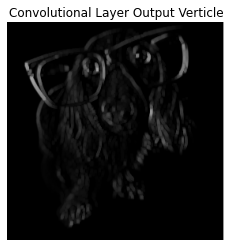

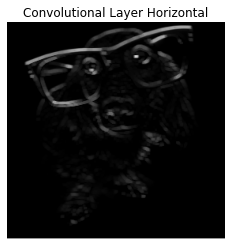

In [156]:
image_out = pool_out
plt.imshow(image_out[0,0,:,:], cmap="gray")
plt.axis('off')
plt.title('Convolutional Layer Output Verticle')
plt.show()
plt.imshow(image_out[0,1,:,:], cmap="gray")
plt.axis('off')
plt.title('Convolutional Layer Horizontal')
plt.show()